## Analizando la clasificación de sentimientos múltiples con los modelos:
1. SVC
2. LinearSVC
3. RandomForestClassifier
4. DecisionTreeClassifier

In [1]:
import sys
sys.path.append(sys.path[0] + '/..')
from bdd import mongoDB_cliente

auditoria_ml_sentimientos_multiple = mongoDB_cliente.obtenerColeccion('AUDITORIA', {'tipo auditoria': 'Modelos Aprendizaje Automático', 
'proceso': 'Clasifiación Sentimientos Múltiples', 'cantante': '', 'canción':''})   

modelos_duracion = {}
modelos_resultado = {}
modelos_parametros = {}
for pista in auditoria_ml_sentimientos_multiple:
    modelos_duracion[pista['modelo']] = [pista['modelo'], pista['duración']]
    modelos_resultado[pista['modelo']] = [pista['modelo'], pista['parametros y resultados'][1]] 
    modelos_parametros[pista['modelo']] = [pista['modelo'], pista['parametros y resultados'][0]] 

## Análisis del tiempo de entrenamiento

-------------  ------------  ----------------------  ----------------------
SVC            LinearSVC     RandomForestClassifier  DecisionTreeClassifier
55.0 segundos  5.0 segundos  49.0 segundos           17.0 segundos
-------------  ------------  ----------------------  ----------------------


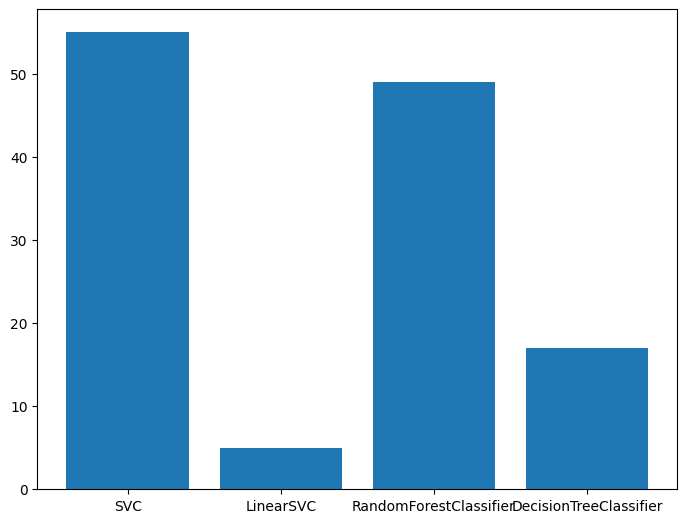

In [2]:
from tabulate import tabulate
import matplotlib.pyplot as plt

print(tabulate(modelos_duracion))

modeloSVC = modelos_duracion['SVC'][0]
duracionSVC = int(float(modelos_duracion['SVC'][1].split(' ')[0]))
modeloLSVC = modelos_duracion['LinearSVC'][0]
duracionLSVC = int(float(modelos_duracion['LinearSVC'][1].split(' ')[0]))
modeloLRForest = modelos_duracion['RandomForestClassifier'][0]
duracionRForest = int(float(modelos_duracion['RandomForestClassifier'][1].split(' ')[0]))
modeloDTree = modelos_duracion['DecisionTreeClassifier'][0]
duracionDTree = int(float(modelos_duracion['DecisionTreeClassifier'][1].split(' ')[0]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [modeloSVC, modeloLSVC, modeloLRForest, modeloDTree]
students = [duracionSVC,duracionLSVC,duracionRForest,duracionDTree]
ax.bar(langs,students)
plt.show()

In [3]:
print ("{:<25} {:<25} {:<25}".format('Modelo', 'Precisión entrenamiento', 'Precisión pruebas'))
print ("{:<25} {:<25} {:<25}".format('-----------------------', '-----------------------', '-----------------------'))
for r in modelos_resultado:
    resultado = modelos_resultado[r][1]
    print ("{:<25} {:<25} {:<25}".format(r, resultado['Precisión entrenamiento'], resultado['Precisión pruebas']))

Modelo                    Precisión entrenamiento   Precisión pruebas        
-----------------------   -----------------------   -----------------------  
SVC                       0.911096256684492         0.4772727272727273       
LinearSVC                 0.9991644385026738        0.5588235294117647       
RandomForestClassifier    0.9991644385026738        0.5294117647058824       
DecisionTreeClassifier    0.9991644385026738        0.4244652406417112       


In [4]:
for p in modelos_parametros:
    print('\nModelo: ', p)
    print ("{:<35} {:<15}".format('Parámetro', 'Valor'))
    print ("{:<35} {:<15}".format('-------------', '---------------'))
    parametros = modelos_parametros[p][1]
    for pp in parametros:
        #print(pp)
        #print(parametros[pp])
        print ("{:<35} {:<15}".format(pp, str(parametros[pp])))
    #print ("{:<25} {:<400}".format(p, ''))
    #print(parametros)
    


Modelo:  SVC
Parámetro                           Valor          
-------------                       ---------------
C                                   1.0            
break_ties                          False          
cache_size                          200            
class_weight                        None           
coef0                               0.0            
decision_function_shape             ovr            
degree                              3              
gamma                               scale          
kernel                              rbf            
max_iter                            -1             
probability                         False          
random_state                        None           
shrinking                           True           
tol                                 0.001          
verbose                             False          

Modelo:  LinearSVC
Parámetro                           Valor          
-------------                 